In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [6]:
#=============== PART III ========================#

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn import metrics

# Part III Classification

# Data preprocessing

# Import data
df_tickets = pd.read_csv('./data/data.csv')

# Drop the unessarry columns
df_tickets = df_tickets.dropna(how='all', axis=1)
df_tickets.drop(['SUS'], axis=1, inplace=True)

# Train test split for model
y = df_tickets['Purchase'].copy()
X = df_tickets.drop(['Purchase'], axis=1)

# Normalize Values

scale = StandardScaler()
scaled_X = scale.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.25, random_state=101)



In [7]:
# Define models
log_reg = LogisticRegression()
support_vm = svm.SVC()
nb = GaussianNB()
randf = RandomForestClassifier()


# Train models
log_reg.fit(X_train, y_train)
support_vm.fit(X_train, y_train)
nb.fit(X_train, y_train)
randf.fit(X_train, y_train)


RandomForestClassifier()

              precision    recall  f1-score   support

           0       0.92      0.86      0.89        14
           1       0.83      0.91      0.87        11

    accuracy                           0.88        25
   macro avg       0.88      0.88      0.88        25
weighted avg       0.88      0.88      0.88        25



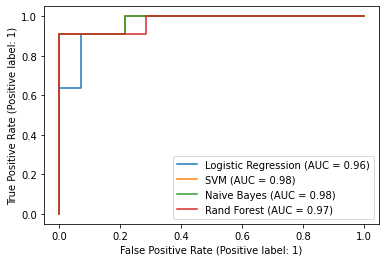

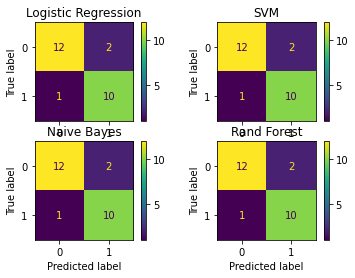

In [11]:
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

def get_metrics(x_test, y_test, classifier, name): 
    #train model

    y_pred = classifier.predict(x_test)
    y_test = y_test.reset_index(drop=True)

    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)

    return accuracy, precision, recall

log_acc, log_prec, log_rec = get_metrics(x_test=X_test, y_test=y_test, classifier=log_reg, name='Logistic Regression')
svm_acc, svm_prec, svm_rec = get_metrics(x_test=X_test, y_test=y_test, classifier=support_vm, name='Support Vector Machine')
nb_acc, nb_prec, nb_rec = get_metrics(x_test=X_test, y_test=y_test, classifier=nb, name='Naive Bayes')
randf_acc, randf_prec, randf_rec = get_metrics(x_test=X_test, y_test=y_test, classifier=randf, name='Random Forest')


# Visualize ROC Curves
fig, ax = plt.subplots()

RocCurveDisplay.from_estimator(log_reg, X_test, y_test, ax=ax, name="Logistic Regression")
RocCurveDisplay.from_estimator(support_vm, X_test, y_test, ax=ax, name="SVM")
RocCurveDisplay.from_estimator(nb, X_test, y_test, ax=ax, name="Naive Bayes")
RocCurveDisplay.from_estimator(randf, X_test, y_test, ax=ax, name="Rand Forest")

# Visualize 
fig2, ([ax1, ax2], [ax3,ax4]) = plt.subplots(2,2)
ax1.set_title('Logistic Regression')
ax2.set_title('SVM')
ax3.set_title('Naive Bayes')
ax4.set_title('Rand Forest')


ConfusionMatrixDisplay.from_estimator(log_reg, X_test, y_test, ax=ax1)
ConfusionMatrixDisplay.from_estimator(support_vm, X_test, y_test, ax=ax2)
ConfusionMatrixDisplay.from_estimator(nb, X_test, y_test, ax=ax3)
ConfusionMatrixDisplay.from_estimator(randf, X_test, y_test, ax=ax4)



In [16]:
# F1 Scores
print('Logistic Regression')
print(classification_report(y_test, log_reg.predict(X_test)))

print('Support Vector Machine')
print(classification_report(y_test, support_vm.predict(X_test)))

print('Naive Bayes')
print(classification_report(y_test, nb.predict(X_test)))

print('Random Forest')
print(classification_report(y_test, randf.predict(X_test)))

Logistic Regression
              precision    recall  f1-score   support

           0       0.92      0.86      0.89        14
           1       0.83      0.91      0.87        11

    accuracy                           0.88        25
   macro avg       0.88      0.88      0.88        25
weighted avg       0.88      0.88      0.88        25

Support Vector Machine
              precision    recall  f1-score   support

           0       0.92      0.86      0.89        14
           1       0.83      0.91      0.87        11

    accuracy                           0.88        25
   macro avg       0.88      0.88      0.88        25
weighted avg       0.88      0.88      0.88        25

Naive Bayes
              precision    recall  f1-score   support

           0       0.92      0.86      0.89        14
           1       0.83      0.91      0.87        11

    accuracy                           0.88        25
   macro avg       0.88      0.88      0.88        25
weighted avg       